In [1]:
import numpy as np
import time

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

from gbgpu.gbgpu import GBGPU
from gbgpu.thirdbody import GBGPUThirdBody


from gbgpu.utils.constants import *
from gbgpu.utils.utility import *
from Noise import AnalyticNoise

from utils import add_Signals, adjust_frequency_range, add_Signals2

In [2]:
gb1 = GBGPU(use_gpu=False)
gb2 = GBGPU(use_gpu=False)


In [3]:
dt = 10.0    # Sample rate (Nyquist is safely larger than the maximum frequency we will encounter) 
Tobs = 1* YEAR  #Temps d'observation


# number of points in waveform
# if None, will determine inside the code based on amp, f0 (and P2 if running third-body waveform)
N = 128

# number of binaries to batch
num_bin = 100

# parameters
amp1 = 2e-21  # amplitude
f01 = 2e-3  # f0
fdot1 = 7.538331e-18  # fdot
fddot1 = 0.0 # fddot
phi01 = 0  # initial phase
iota1 = 0  # inclination
psi1 = 0.3  # polarization angle
lam1 = 0.4  # ecliptic longitude
beta_sky1 = 0.5  # ecliptic latitude


amp2 = amp1  # amplitude
f02 = f01  # f0
fdot2 = fdot1  # fdot
fddot2 = 0.0 # fddot
phi02 = 0  # initial phase
iota2 = 0  # inclination
psi2 = 0.3  # polarization angle
lam2 = 0.4  # ecliptic longitude
beta_sky2 = 0.5  # ecliptic latitude



/tmp/ipykernel_57582/1846541414.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 0].legend()
/tmp/ipykernel_57582/1846541414.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()
/tmp/ipykernel_57582/1846541414.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 0].legend()
/tmp/ipykernel_57582/1846541414.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()


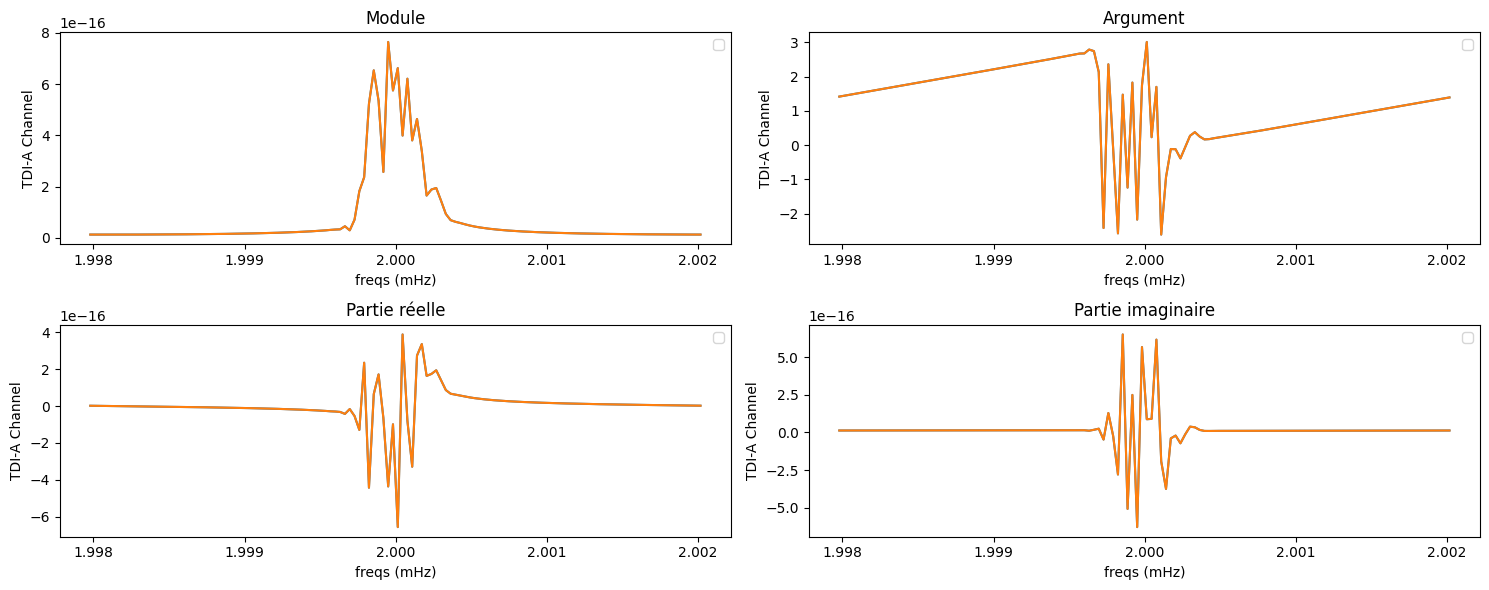

In [4]:
params1 = np.array(
    [amp1, f01, fdot1, fddot1, phi01, iota1, psi1, lam1, beta_sky1,]
)

params2 = np.array(
    [amp2, f02, fdot2, fddot2, phi02, iota2, psi2, lam2, beta_sky2,]
)


gb1.run_wave(*params1, N=N, dt=dt, T=Tobs, oversample=2)

gb2.run_wave(*params2, N=N, dt=dt, T=Tobs, oversample=2)



A0 = gb1.A[0]
A1 = gb2.A[0]
freqs1 = 1000*gb1.freqs[0]
freqs2 = 1000*gb2.freqs[0]


x = 2
y = 1.0001*x

# signal from first binary
fig, axs = plt.subplots(2, 2, figsize=(15, 6))


# Premier graphique (en haut à gauche)
axs[0, 0].plot(freqs1, np.abs(A0))
axs[0, 0].plot(freqs2, np.abs(A1))
# axs[0, 0].axvline(x=x, color='r', linestyle='--', label=f"x = {x}")
# axs[0, 0].axvline(x=y, color='g', linestyle='--', label=f"x = {x}")
axs[0, 0].set_title("Module")
axs[0, 0].set_xlabel("freqs (mHz)")
axs[0, 0].set_ylabel("TDI-A Channel")
axs[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
#axs[0,0].set_xlim([1.997, 2.005])
axs[0, 0].legend()

# Deuxième graphique (en haut à droite)
axs[0, 1].plot(freqs1, np.angle(A0))
axs[0, 1].plot(freqs2, np.angle(A1))
# axs[0, 1].axvline(x=x, color='r', linestyle='--', label=f"x = {x}")
axs[0, 1].set_title("Argument")
axs[0, 1].set_xlabel("freqs (mHz)")
axs[0, 1].set_ylabel("TDI-A Channel")
axs[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 1].legend()

# Troisième graphique (en bas à gauche)
axs[1, 0].plot(freqs1, A0.real)
axs[1, 0].plot(freqs2, A1.real)
# axs[1, 0].axvline(x=x, color='r', linestyle='--', label=f"x = {x}")
axs[1, 0].set_title("Partie réelle")
axs[1, 0].set_xlabel("freqs (mHz)")
axs[1, 0].set_ylabel("TDI-A Channel")
axs[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 0].legend()

# Quatrième graphique (en bas à droite)
axs[1, 1].plot(freqs1, A0.imag)
axs[1, 1].plot(freqs2, A1.imag)
# axs[1, 1].axvline(x=x, color='r', linestyle='--', label=f"x = {x}")
axs[1, 1].set_title("Partie imaginaire")
axs[1, 1].set_xlabel("freqs (mHz)")
axs[1, 1].set_ylabel("TDI-A Channel")
axs[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 1].legend()

# Ajuster l'espace entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()




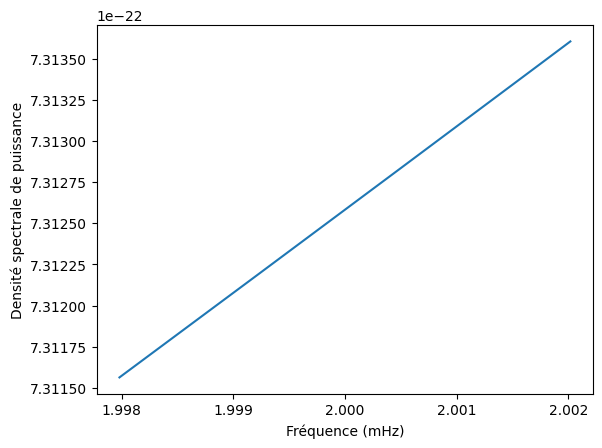

In [5]:
noise = AnalyticNoise(freqs1*1e-3)
psd_A, psd_E = noise.psd(option="A"), noise.psd(option="E")




fig, ax = plt.subplots()  # Créer une figure avec un axe
ax.plot(freqs1, np.sqrt(psd_A))  # Tracer la courbe
ax.set_xlabel("Fréquence (mHz)")
ax.set_ylabel("Densité spectrale de puissance")
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # Limiter le nombre de ticks X

plt.show()

/tmp/ipykernel_57582/1587332933.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 0].legend()
/tmp/ipykernel_57582/1587332933.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()
/tmp/ipykernel_57582/1587332933.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 0].legend()
/tmp/ipykernel_57582/1587332933.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()


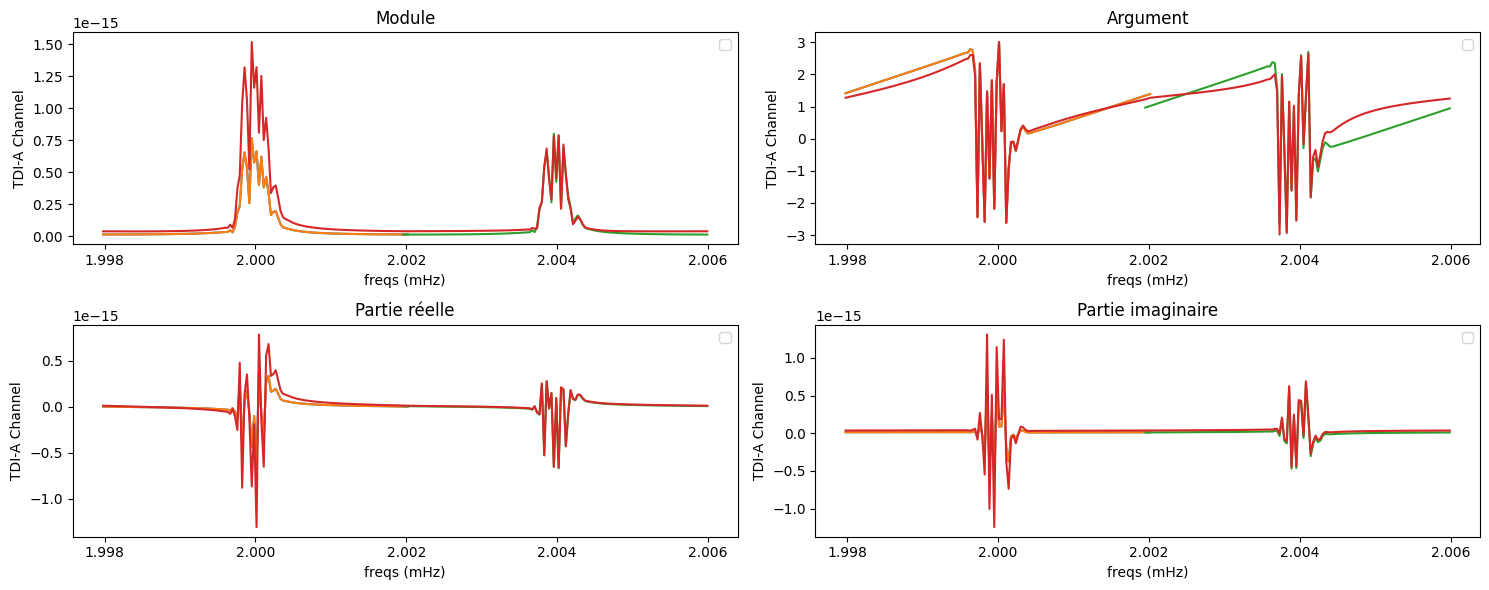

In [6]:
gb3 = GBGPU(use_gpu=False)



amp3 = amp1  # amplitude
f03 = 1.002*f01  # f0
fdot3 = fdot1  # fdot
fddot3 = 0.0 # fddot
phi03 = 0.1  # initial phase
iota3 = 0.2  # inclination
psi3 = 0.3  # polarization angle
lam3 = 0.4  # ecliptic longitude
beta_sky3 = 0.5  # ecliptic latitude

params3 = np.array(
    [amp3, f03, fdot3, fddot3, phi03, iota3, psi3, lam3, beta_sky3,]
)

gb3.run_wave(*params3, N=N, dt=dt, T=Tobs, oversample=2)

A2 = gb3.A[0]
freqs3 = 1000*gb3.freqs[0]



Signals = np.column_stack((A0, A1, A2))
Freqs = np.column_stack((freqs1, freqs2, freqs3))


S, f = add_Signals(Signals, Freqs, N)






# signal from first binary
fig, axs = plt.subplots(2, 2, figsize=(15, 6))


# Premier graphique (en haut à gauche)
axs[0, 0].plot(freqs1, np.abs(A0))
axs[0, 0].plot(freqs2, np.abs(A1))
axs[0, 0].plot(freqs3, np.abs(A2))
axs[0, 0].plot(f, np.abs(S))
axs[0, 0].set_title("Module")
axs[0, 0].set_xlabel("freqs (mHz)")
axs[0, 0].set_ylabel("TDI-A Channel")
axs[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
#axs[0,0].set_xlim([1.997, 2.005])
axs[0, 0].legend()

# Deuxième graphique (en haut à droite)
axs[0, 1].plot(freqs1, np.angle(A0))
axs[0, 1].plot(freqs2, np.angle(A1))
axs[0, 1].plot(freqs3, np.angle(A2))
axs[0, 1].plot(f, np.angle(S))
axs[0, 1].set_title("Argument")
axs[0, 1].set_xlabel("freqs (mHz)")
axs[0, 1].set_ylabel("TDI-A Channel")
axs[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 1].legend()

# Troisième graphique (en bas à gauche)
axs[1, 0].plot(freqs1, A0.real)
axs[1, 0].plot(freqs2, A1.real)
axs[1, 0].plot(freqs3, A2.real)
axs[1, 0].plot(f, S.real)
axs[1, 0].set_title("Partie réelle")
axs[1, 0].set_xlabel("freqs (mHz)")
axs[1, 0].set_ylabel("TDI-A Channel")
axs[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 0].legend()

# Quatrième graphique (en bas à droite)
axs[1, 1].plot(freqs1, A0.imag)
axs[1, 1].plot(freqs2, A1.imag)
axs[1, 1].plot(freqs3, A2.imag)
axs[1, 1].plot(f, S.imag)
axs[1, 1].set_title("Partie imaginaire")
axs[1, 1].set_xlabel("freqs (mHz)")
axs[1, 1].set_ylabel("TDI-A Channel")
axs[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 1].legend()

# Ajuster l'espace entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

31
31


/tmp/ipykernel_57582/1635325664.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 0].legend()
/tmp/ipykernel_57582/1635325664.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()
/tmp/ipykernel_57582/1635325664.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 0].legend()
/tmp/ipykernel_57582/1635325664.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()


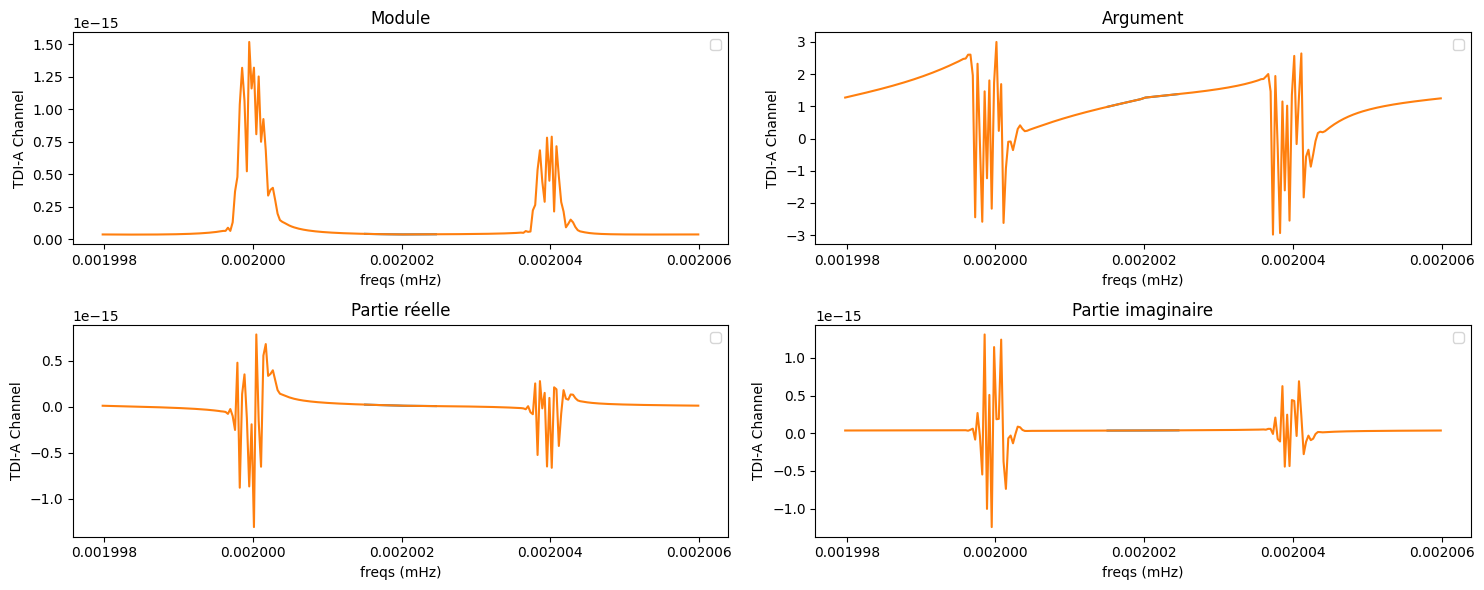

In [7]:

freqs1 = gb1.freqs[0]
freqs2 = gb2.freqs[0]
freqs3 = gb3.freqs[0]

Freqs = np.column_stack((freqs1, freqs2, freqs3))
S, f = add_Signals(Signals, Freqs, N)
signal_adjusted, frequencies_adjusted = adjust_frequency_range(S, f, 1e-6)

print(len(frequencies_adjusted))
print(len(signal_adjusted))
# signal from first binary
fig, axs = plt.subplots(2, 2, figsize=(15, 6))


# Premier graphique (en haut à gauche)
axs[0, 0].plot(frequencies_adjusted, np.abs(signal_adjusted))
axs[0, 0].plot(f, np.abs(S))
axs[0, 0].set_title("Module")
axs[0, 0].set_xlabel("freqs (mHz)")
axs[0, 0].set_ylabel("TDI-A Channel")
axs[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
#axs[0,0].set_xlim([1.997, 2.005])
axs[0, 0].legend()

# Deuxième graphique (en haut à droite)
axs[0, 1].plot(frequencies_adjusted, np.angle(signal_adjusted))
axs[0, 1].plot(f, np.angle(S))
axs[0, 1].set_title("Argument")
axs[0, 1].set_xlabel("freqs (mHz)")
axs[0, 1].set_ylabel("TDI-A Channel")
axs[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 1].legend()

# Troisième graphique (en bas à gauche)
axs[1, 0].plot(frequencies_adjusted, signal_adjusted.real)
axs[1, 0].plot(f, S.real)
axs[1, 0].set_title("Partie réelle")
axs[1, 0].set_xlabel("freqs (mHz)")
axs[1, 0].set_ylabel("TDI-A Channel")
axs[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 0].legend()

# Quatrième graphique (en bas à droite)
axs[1, 1].plot(frequencies_adjusted, signal_adjusted.imag)
axs[1, 1].plot(f, S.imag)
axs[1, 1].set_title("Partie imaginaire")
axs[1, 1].set_xlabel("freqs (mHz)")
axs[1, 1].set_ylabel("TDI-A Channel")
axs[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 1].legend()

# Ajuster l'espace entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

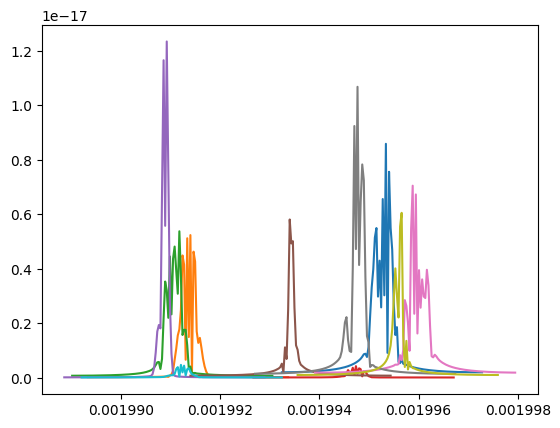

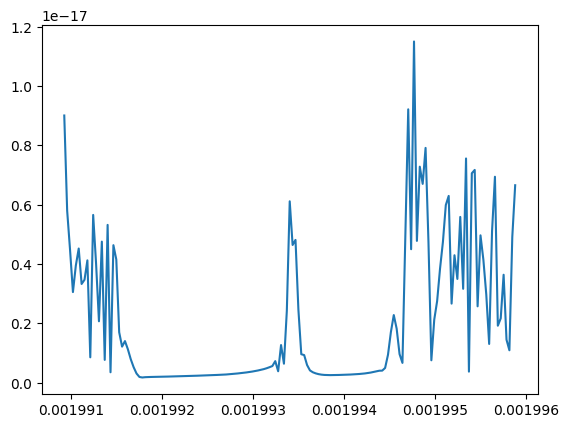

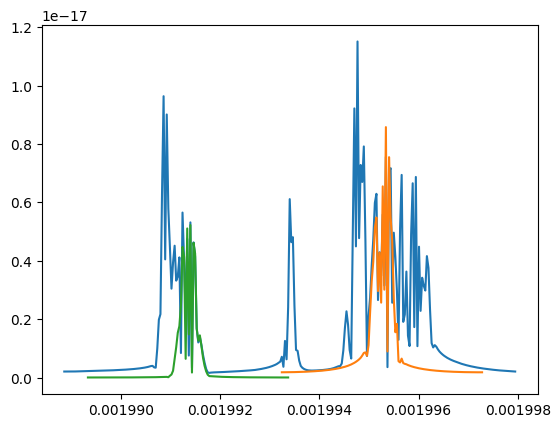

In [8]:



num_samples = 10

#f0 = np.random.uniform(0.0019975, 0.0019975 + 10e-6 , num_samples)
f0 = np.random.uniform(0.00199, 0.00199 + 6*1e-6 , num_samples)
amp = np.random.uniform(3e-23, 1e-24, num_samples)
fdot = np.random.uniform(7.538331e-16, 7.538331e-18 , num_samples)    
fddot = np.zeros(num_samples)
phi0 = np.random.uniform(0, 2*np.pi, num_samples) 
iota = np.random.uniform(0, 2*np.pi, num_samples) 
psi = np.random.uniform(0, 2*np.pi, num_samples)  
lam = np.random.uniform(0, 2*np.pi, num_samples) 
beta_sky = np.random.uniform(0,2*np.pi , num_samples) 


all_parameters = np.vstack((amp, f0, fdot, fddot, -phi0, iota, psi, lam, beta_sky)).T

gb = GBGPU(use_gpu=False)
gb.run_wave(*all_parameters.T, N = N, dt = dt, T = Tobs, oversample = 1)

Signals = np.array([gb.A[i] for i in range(num_samples)]).T
Freqs = np.array([gb.freqs[i] for i in range(num_samples)]).T



plt.figure()
for i in range(num_samples):
    plt.plot(Freqs[:,i], np.abs(Signals[:,i]))

# plt.plot(Freqs[:,1], np.abs(Signals[:,1]))
siiiii, freeee = add_Signals2(Signals, Freqs)

S, f = adjust_frequency_range(siiiii, freeee, 5*1e-6 )

plt.figure()
plt.plot(f, np.abs(S))



plt.figure()
plt.plot(freeee, np.abs(siiiii))
plt.plot(Freqs[:,0], np.abs(Signals[:,0]))
plt.plot(Freqs[:,1], np.abs(Signals[:,1]))





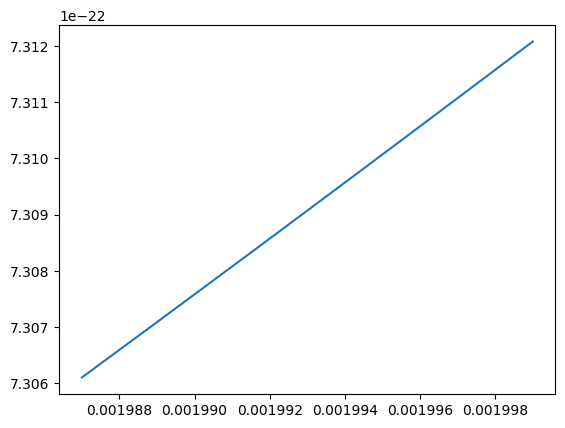

In [9]:
df = 1./Tobs
dt = 15.0
N = 128
num_samples = 3

f_min = 0.00199
f_max = f_min + 6*1e-6
f0 = np.random.uniform(f_min, f_max , num_samples)
amp = np.random.uniform(1e-23, 1e-21, num_samples)
fdot = np.random.uniform(7.538331e-16, 7.538331e-18 , num_samples)    
fddot = 1e-40*np.ones(num_samples)
phi0 = np.random.uniform(0, 2*np.pi, num_samples) 
iota = np.random.uniform(0, 2*np.pi, num_samples) 
psi = np.random.uniform(0, 2*np.pi, num_samples)  
lam = np.random.uniform(0, 2*np.pi, num_samples) 
beta_sky = np.random.uniform(0,2*np.pi , num_samples) 


all_parameters = np.vstack((amp, f0, fdot, fddot, -phi0, iota, psi, lam, beta_sky)).T

gb = GBGPU(use_gpu=False)
gb.run_wave(*all_parameters.T, N = N, dt = dt, T = Tobs, oversample = 1)

f_min0 = f_min - 3*1e-6
f_max0 = f_max + 3*1e-6
num_bins = int((f_max0 - f_min0) / df) + 1
sample_frequencies = np.linspace(f_min0, f_max0, num=num_bins)

noise = AnalyticNoise(sample_frequencies)
psd_A  = noise.psd(option='A')
asd_A = np.sqrt(psd_A)

plt.plot(sample_frequencies, asd_A)





(3, 378)


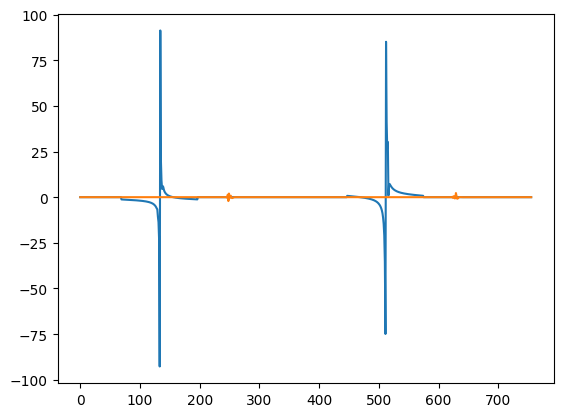

In [10]:
k_min = round(f_min0/df)
k_max = round(f_max0/df)
num = len(sample_frequencies)

# These indices describe how to stitch the waveform into the larger frequency grid.
i_start = (gb.start_inds - k_min).astype(np.int32)
i_end = (gb.start_inds - k_min + gb.N).astype(np.int32)

# PyTorch by default uses float32, and that should be sufficient for our purposes.
# Here we use complex64 since the frequency-domain strain is complex.

A_whitened = np.empty((num_samples, num), dtype=np.complex64)

for i in range(num_samples):
    x = np.zeros(num, dtype=np.complex128)
    x[i_start[i]:i_end[i]] = gb.A[i]
    x *= np.sqrt(4 * df) / asd_A
    A_whitened[i] = x

# plt.plot(sample_frequencies, A_whitened[0].real)
# z = A_whitened[0].real + A_whitened[1].real
# plt.plot(sample_frequencies, z)

waveforms = np.hstack((A_whitened.real, A_whitened.imag))

plt.plot(waveforms[0])
plt.plot(waveforms[1])


print(A_whitened.shape)

In [11]:
sampling_parameters = np.vstack((amp, f0, fdot, fddot, -phi0, iota, psi, lam, beta_sky)).T

parameters_mean = np.mean(sampling_parameters, axis=0)
parameters_std = np.std(sampling_parameters, axis=0)

parameters_standardized = (sampling_parameters - parameters_mean) / parameters_std
parameters_standardized = parameters_standardized.astype(np.float32)


waveforms = np.hstack((A_whitened.real, A_whitened.imag))

/tmp/ipykernel_57582/1361762610.py:6: RuntimeWarning: invalid value encountered in divide
  parameters_standardized = (sampling_parameters - parameters_mean) / parameters_std


In [12]:
df = 1./Tobs
dt = 15.0
N = 128
num_samples = 10

f_min = 0.00199
f_max = f_min + 2*1e-6
f0 = np.random.uniform(f_min, f_max , num_samples)
amp = np.random.uniform(5*1e-22, 1e-21, num_samples)
fdot = np.random.uniform(7.538331e-16, 7.538331e-18 , num_samples)    
fddot = np.zeros(num_samples)  # np.random.uniform(1e-50, 1e-49, num_samples)
phi0 = np.random.uniform(0, 2*np.pi, num_samples) 
iota = np.random.uniform(0, 2*np.pi, num_samples) 
psi = np.random.uniform(0, 2*np.pi, num_samples)  
lam = np.random.uniform(0, 2*np.pi, num_samples) 
beta_sky = np.random.uniform(0,2*np.pi , num_samples) 


all_parameters = np.vstack((amp, f0, fdot, fddot, -phi0, iota, psi, lam, beta_sky)).T

gb = GBGPU(use_gpu=False)
gb.run_wave(*all_parameters.T, N = N, dt = dt, T = Tobs, oversample = 1)


f_min0 = f_min - 3 * 1e-6
f_max0 = f_max + 3 * 1e-6
num_bins = int((f_max0 - f_min0) / df) + 1
sample_frequencies = np.linspace(f_min0, f_max0, num=num_bins)

noise = AnalyticNoise(sample_frequencies)
psd_A = noise.psd(option="A")
asd_A = np.sqrt(psd_A)

k_min = round(f_min0 / df)
k_max = round(f_max0 / df)
num = len(sample_frequencies)

i_start = (gb.start_inds - k_min).astype(np.int32)
i_end = (gb.start_inds - k_min + gb.N).astype(np.int32)


A_whitened = np.empty((num_samples, num), dtype=np.complex64)


for i in range(num_samples):
    x = np.zeros(num, dtype=np.complex128)
    x[i_start[i] : i_end[i]] = gb.A[i]
    x = x * np.sqrt(4 * df) / asd_A
    A_whitened[i] = x

waveforms = np.hstack((A_whitened.real, A_whitened.imag))



/tmp/ipykernel_57582/1008346888.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 0].legend()
/tmp/ipykernel_57582/1008346888.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()
/tmp/ipykernel_57582/1008346888.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 0].legend()
/tmp/ipykernel_57582/1008346888.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()
/tmp/ipykernel_57582/1008346888.py:64: UserWarning: No artists with labels found

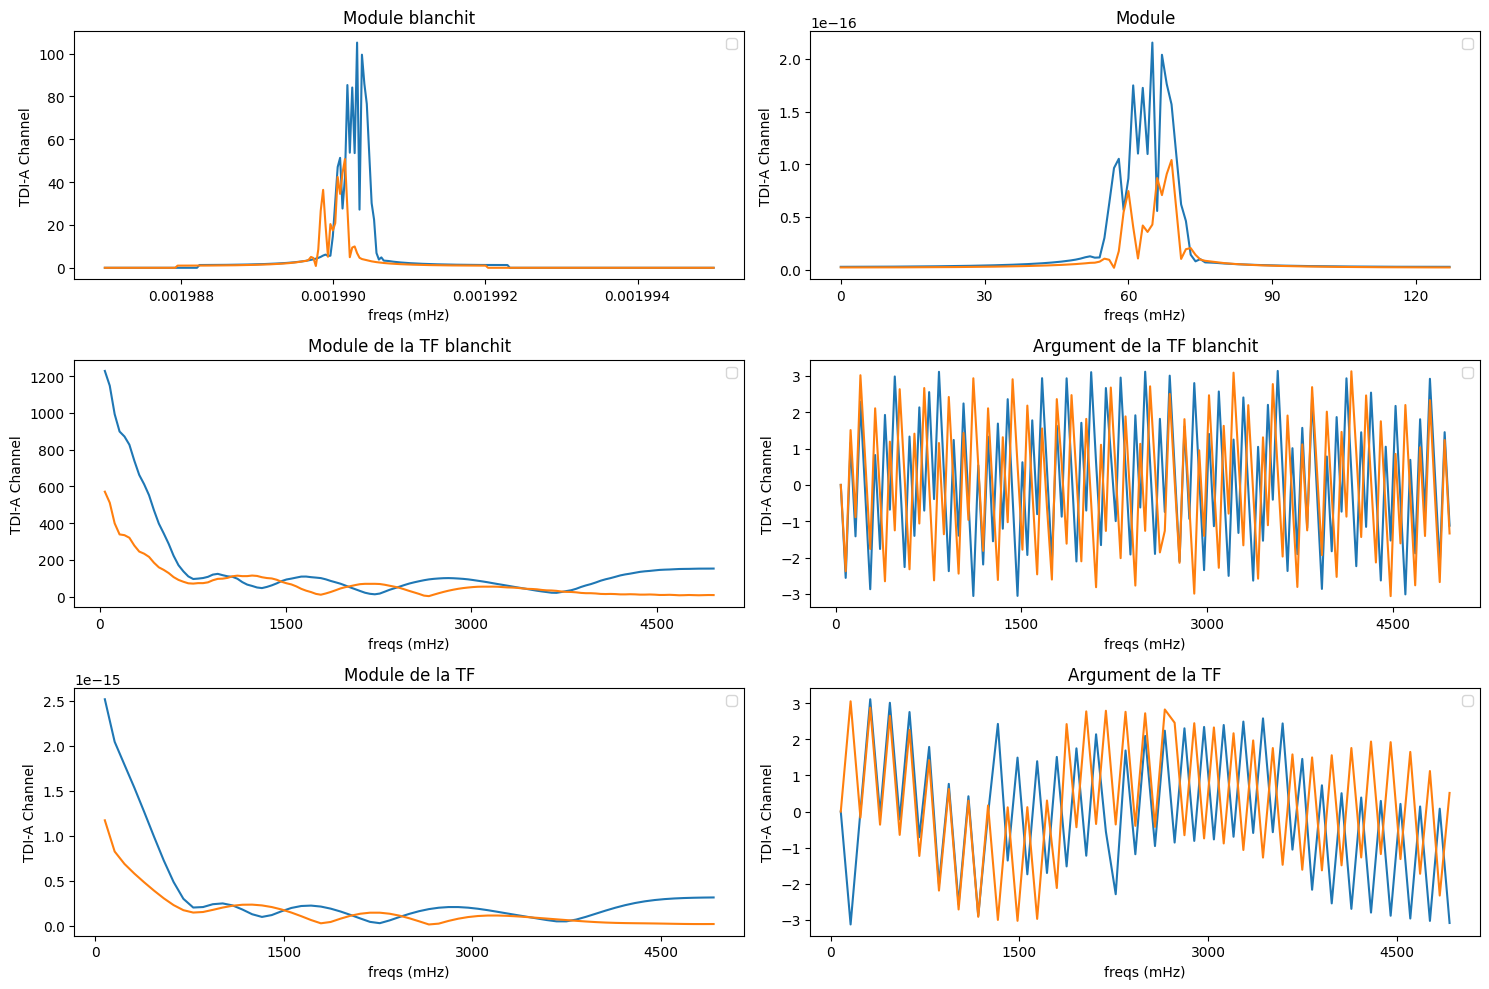

In [13]:
fs = 10000

Aw0 = np.fft.fft(np.abs(A_whitened[0]))
Aw0 = Aw0[0:int(-1+ len(Aw0)/2)]
frequencies = np.fft.fftfreq(len(A_whitened[0]), 1/fs) 
frequencies = frequencies[frequencies > 0]

GB0 = np.fft.fft(np.abs(gb.A[0]))
GB0 = GB0[0:int(-1+ len(GB0)/2)]
frequencies1 = np.fft.fftfreq(len(gb.A[0]), 1/fs) 
frequencies1 = frequencies1[frequencies1 > 0] 


Aw1 = np.fft.fft(np.abs(A_whitened[1]))
GB1 = np.fft.fft(np.abs(gb.A[1]))

Aw1 = Aw1[0:int(-1+ len(Aw1)/2)]
GB1 = GB1[0:int(-1+ len(GB1)/2)]

fig, axs = plt.subplots(3, 2, figsize=(15, 10))


axs[0, 0].plot(sample_frequencies, np.abs(A_whitened[0]))
axs[0, 0].plot(sample_frequencies, np.abs(A_whitened[1]))
axs[0, 0].set_title("Module blanchit")
axs[0, 0].set_xlabel("freqs (mHz)")
axs[0, 0].set_ylabel("TDI-A Channel")
axs[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 0].legend()

axs[0, 1].plot(np.abs(gb.A[0]))
axs[0, 1].plot(np.abs(gb.A[1]))
axs[0, 1].set_title("Module")
axs[0, 1].set_xlabel("freqs (mHz)")
axs[0, 1].set_ylabel("TDI-A Channel")
axs[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 1].legend()


axs[1, 0].plot(frequencies, np.abs(Aw0))
axs[1, 0].plot(frequencies, np.abs(Aw1))
axs[1, 0].set_title("Module de la TF blanchit")
axs[1, 0].set_xlabel("freqs (mHz)")
axs[1, 0].set_ylabel("TDI-A Channel")
axs[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 0].legend()

# Deuxième graphique (en haut à droite)
axs[1, 1].plot(frequencies, np.angle(Aw0))
axs[1, 1].plot(frequencies, np.angle(Aw1))
axs[1, 1].set_title("Argument de la TF blanchit")
axs[1, 1].set_xlabel("freqs (mHz)")
axs[1, 1].set_ylabel("TDI-A Channel")
axs[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 1].legend()

# Troisième graphique (en bas à gauche)
axs[2, 0].plot(frequencies1, np.abs(GB0))
axs[2, 0].plot(frequencies1, np.abs(GB1))
axs[2, 0].set_title("Module de la TF")
axs[2, 0].set_xlabel("freqs (mHz)")
axs[2, 0].set_ylabel("TDI-A Channel")
axs[2, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[2, 0].legend()

# Quatrième graphique (en bas à droite)
axs[2, 1].plot(frequencies1, np.angle(GB0))
axs[2, 1].plot(frequencies1, np.angle(GB1))
axs[2, 1].set_title("Argument de la TF")
axs[2, 1].set_xlabel("freqs (mHz)")
axs[2, 1].set_ylabel("TDI-A Channel")
axs[2, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[2, 1].legend()

# Ajuster l'espace entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

/tmp/ipykernel_57582/558586274.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 0].legend()
/tmp/ipykernel_57582/558586274.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()
/tmp/ipykernel_57582/558586274.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 0].legend()
/tmp/ipykernel_57582/558586274.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()
/tmp/ipykernel_57582/558586274.py:56: UserWarning: No artists with labels found to p

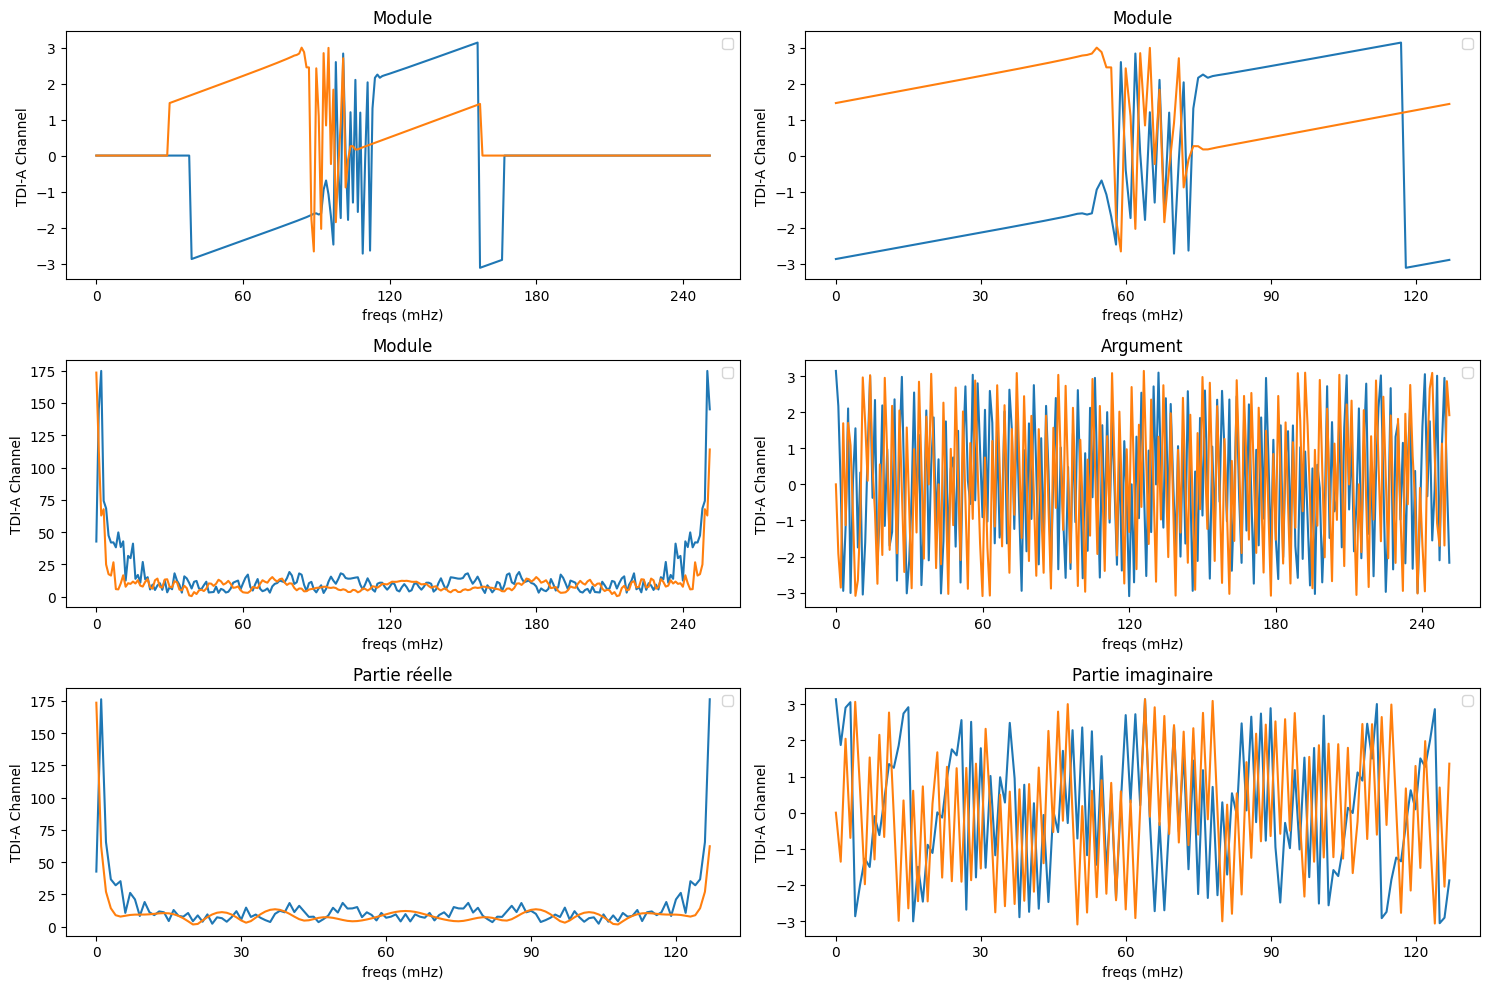

In [14]:
fs = 10000

Aw0 = np.fft.fft(np.angle(A_whitened[0]))
GB0 = np.fft.fft(np.angle(gb.A[0]))

Aw1 = np.fft.fft(np.angle(A_whitened[1]))
GB1 = np.fft.fft(np.angle(gb.A[1]))




fig, axs = plt.subplots(3, 2, figsize=(15, 10))


axs[0, 0].plot(np.angle(A_whitened[0]))
axs[0, 0].plot(np.angle(A_whitened[1]))
axs[0, 0].set_title("Module")
axs[0, 0].set_xlabel("freqs (mHz)")
axs[0, 0].set_ylabel("TDI-A Channel")
axs[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 0].legend()

axs[0, 1].plot(np.angle(gb.A[0]))
axs[0, 1].plot(np.angle(gb.A[1]))
axs[0, 1].set_title("Module")
axs[0, 1].set_xlabel("freqs (mHz)")
axs[0, 1].set_ylabel("TDI-A Channel")
axs[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 1].legend()


axs[1, 0].plot(np.abs(Aw0))
axs[1, 0].plot(np.abs(Aw1))
axs[1, 0].set_title("Module")
axs[1, 0].set_xlabel("freqs (mHz)")
axs[1, 0].set_ylabel("TDI-A Channel")
axs[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 0].legend()

# Deuxième graphique (en haut à droite)
axs[1, 1].plot(np.angle(Aw0))
axs[1, 1].plot(np.angle(Aw1))
axs[1, 1].set_title("Argument")
axs[1, 1].set_xlabel("freqs (mHz)")
axs[1, 1].set_ylabel("TDI-A Channel")
axs[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 1].legend()

# Troisième graphique (en bas à gauche)
axs[2, 0].plot(np.abs(GB0))
axs[2, 0].plot(np.abs(GB1))
axs[2, 0].set_title("Partie réelle")
axs[2, 0].set_xlabel("freqs (mHz)")
axs[2, 0].set_ylabel("TDI-A Channel")
axs[2, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[2, 0].legend()

# Quatrième graphique (en bas à droite)
axs[2, 1].plot(np.angle(GB0))
axs[2, 1].plot(np.angle(GB1))
axs[2, 1].set_title("Partie imaginaire")
axs[2, 1].set_xlabel("freqs (mHz)")
axs[2, 1].set_ylabel("TDI-A Channel")
axs[2, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[2, 1].legend()

# Ajuster l'espace entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

(10000,)
[[ 1.48876183e+11  0.00000000e+00 -1.25000000e+09]
 [ 1.48876153e+11  9.41559495e+07 -1.24999975e+09]
 [ 1.48876064e+11  1.88311861e+08 -1.24999902e+09]
 ...
 [ 1.48841776e+11 -3.20831749e+09 -1.24971525e+09]
 [ 1.48843766e+11 -3.11418266e+09 -1.24973172e+09]
 [ 1.48845696e+11 -3.02004659e+09 -1.24974770e+09]]


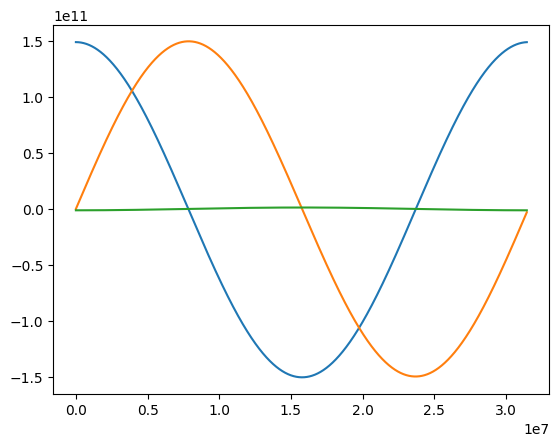

In [15]:
tm = np.linspace(0, Tobs, num=10000)
print(tm.shape)
trajs = gb._spacecraft(tm)
S1, S2, S3 = trajs

print(S1)


plt.plot(tm, S1)

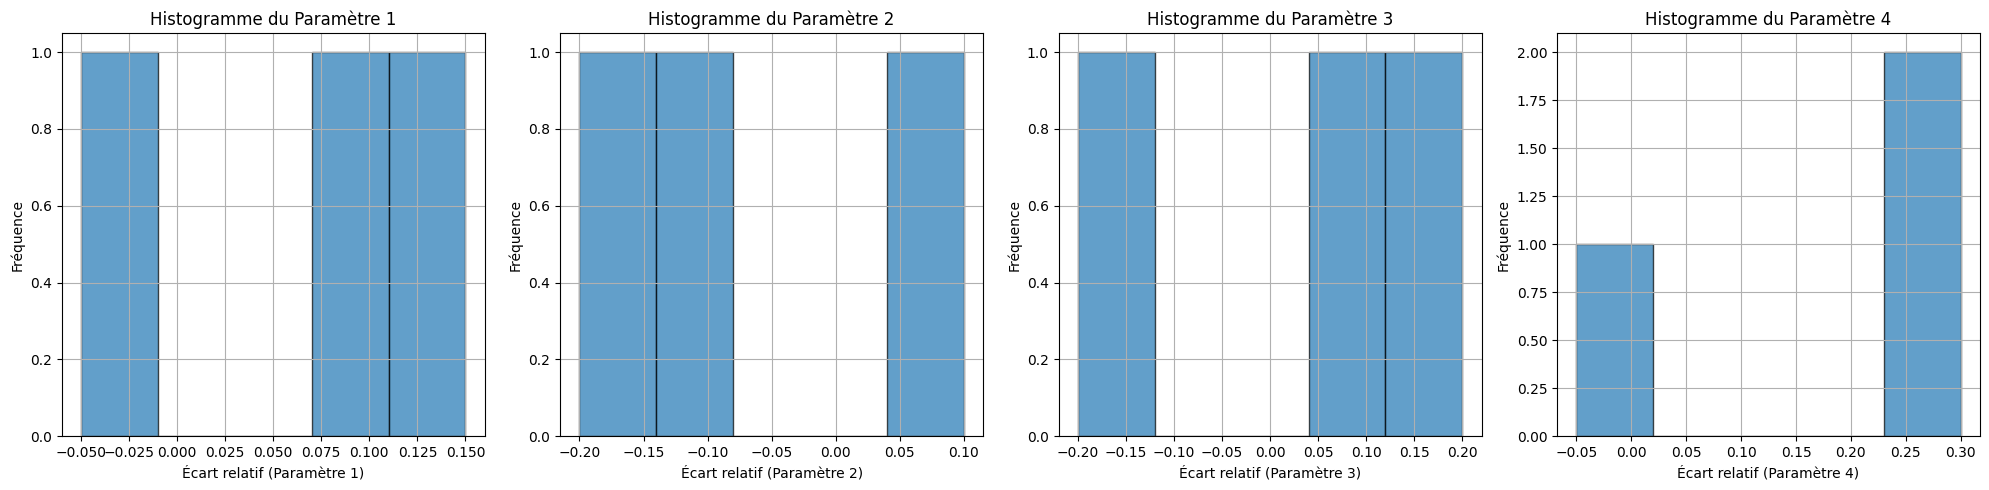

In [16]:
# Exemple de matrice de vecteurs lignes (écarts relatifs)
matrice = np.array([
    [0.1, -0.2, 0.05, 0.3],
    [0.15, -0.1, 0.2, -0.05],
    [-0.05, 0.1, -0.2, 0.25]
])

# Nombre de colonnes (paramètres estimés)
n_colonnes = matrice.shape[1]

# Création des sous-graphiques
fig, axes = plt.subplots(1, n_colonnes, figsize=(5 * n_colonnes, 5))

for i in range(n_colonnes):
    axes[i].hist(matrice[:, i], bins=5, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(f"Écart relatif (Paramètre {i+1})")
    axes[i].set_ylabel("Fréquence")
    axes[i].set_title(f"Histogramme du Paramètre {i+1}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


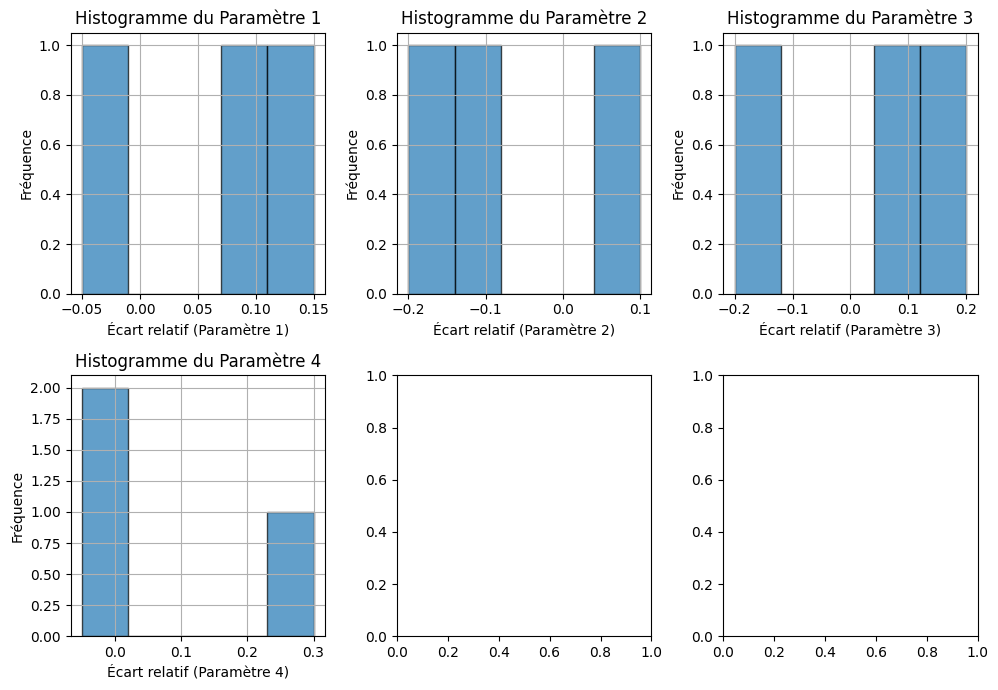

In [17]:
# Exemple de matrice de vecteurs lignes (écarts relatifs)
matrice = np.array([
    [0.1, -0.2, 0.05, 0.3],
    [0.15, -0.1, 0.2, -0.05],
    [-0.05, 0.1, -0.2, -0.05]
])

# Nombre de colonnes (paramètres estimés)
n_colonnes = matrice.shape[1]

# Création des sous-graphiques
fig, axes = plt.subplots(2, 3, figsize=(10, 7))  # Augmente la taille pour une meilleure visibilité
axes = axes.flatten()  # Transforme en une liste 1D d'axes

for i in range(n_colonnes):  # Assurez-vous que n_colonnes ≤ nombre total de sous-plots
    axes[i].hist(matrice[:, i], bins=5, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(f"Écart relatif (Paramètre {i+1})")
    axes[i].set_ylabel("Fréquence")
    axes[i].set_title(f"Histogramme du Paramètre {i+1}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [18]:
def standardize_matrix(matrix):
    mean = np.mean(matrix, axis=0)  # Moyenne par colonne
    std = np.std(matrix, axis=0)    # Écart-type par colonne
    return (matrix - mean) / std

# Exemple : Matrice avec 3 signaux (3 colonnes)
matrice_signaux = np.array([
    [1,  2,  3],  
    [4,  5,  6],  
    [7,  8,  9],  
    [10, 11, 12]  
])

matrice_standardisée = standardize_matrix(matrice_signaux)
print(matrice_standardisée)

[[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]


In [19]:
from sklearn.preprocessing import MinMaxScaler

X = np.array([[10, 200], 
              [20, 400], 
              [30, 600]])

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)